<a href="https://colab.research.google.com/github/silvererudite/30-for-30-ml-projects/blob/main/vision_understanding/extract_colors_from_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage
from sklearn.cluster import KMeans
from collections import Counter

Photo credit: https://unsplash.com/photos/u6nGKLpvZo0?utm_source=unsplash&utm_medium=referral&utm_content=creditShareLink

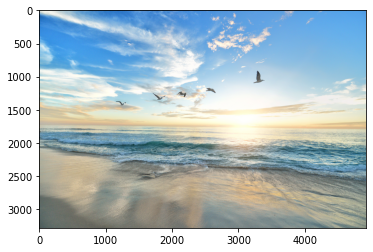

In [4]:
image = plt.imread('ocean.jpg')/255
image.shape
plt.imshow(image)

In [23]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [24]:
image = get_image('/content/ocean.jpg')

In [25]:
pic_n = image.reshape(image.shape[0]*image.shape[1], image.shape[2])
pic_n.shape

(16163840, 3)

In [31]:
clf = KMeans(n_clusters = 5)
labels = clf.fit_predict(pic_n)

In [32]:
labels

array([1, 1, 1, ..., 2, 4, 4], dtype=int32)

In [28]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [34]:
def get_colors(labels):
  counts = Counter(labels)
  center_colors = clf.cluster_centers_
  # We get ordered colors by iterating through the keys
  ordered_colors = [center_colors[i] for i in counts.keys()]
  hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
  rgb_colors = [ordered_colors[i] for i in counts.keys()]

  return rgb_colors, hex_colors
rgb_colors, hex_colors = get_colors(labels)

In [35]:
rgb_colors

[array([167.3076037 , 200.82944461, 221.31173805]),
 array([108.50167928, 123.32952369, 123.09103443]),
 array([234.89940099, 234.88670531, 221.38318355]),
 array([ 97.07219363, 163.87461403, 221.77538089]),
 array([181.21668282, 174.5120646 , 153.87796207])]

In [36]:
hex_colors

['#a7c8dd', '#6c7b7b', '#eaeadd', '#61a3dd', '#b5ae99']